
# <span style="color:rgb(213,80,0)">パラメータ化拡張GFTによるDiGraph辞書の学習</span>

2024年12月31日


村松正吾，内藤翼（新潟大学）

 Under the directory *"code/appendix"*  in this package, please do not forget to run 
 
 **"> pip install ."** 
    
 and then return to this directory.

##
## 参考文献:
-  H. Kitamura, H. Yasuda, Y. Tanaka and S. Muramatsu, "Realization of DiGraph Filters Via Augmented GFT," 2023 IEEE International Conference on Image Processing (ICIP), Kuala Lumpur, Malaysia, 2023, pp. 2885\-2889, doi: 10.1109/ICIP49359.2023.10222618.
-  Abstract: This study proposes a filtering method for directed graph (digraph) signals. In order to realize digraph filtering, a novel graph Fourier transform (GFT), – Augmented GFT (AuGFT) –, is proposed by defining an Hermitian adjacency matrix. Although there has been the same method to give the adjacency matrix of digraphs, this study defines a novel digraph Laplacian. The existing digraph Laplacian does not give the graph signal variation considering the edge directions, while the novel one does. This paper introduces three important ideas. The first is the definition of a novel degree matrix to give the novel digraph Laplacian. The second is to decompose the symmetric and skew\-symmetric components of the novel digraph Laplacian independently into their spectral components. The third is, based on the decomposition, to augment the conventional GFT for digraphs as an invertible real\-valued dictionary. The new GFT is shown to provide a practical form of real\-valued digraph filtering. The significance of the proposed method is verified through simulations of signal filtering on digraphs.
-  URL: [https://ieeexplore.ieee.org/stamp/stamp.jsp?tp=&arnumber=10222618&isnumber=10221892](https://ieeexplore.ieee.org/stamp/stamp.jsp?tp=&arnumber=10222618&isnumber=10221892)

**謝辞：**

-  本研究は[科研費21H04596](https://kaken.nii.ac.jp/ja/grant/KAKENHI-PROJECT-21H04596/)および[科研費22H00512](https://kaken.nii.ac.jp/ja/grant/KAKENHI-PROJECT-22H09512/)助成による。

## 各種設定

In [110]:
# 必要なライブラリのインポート
import subprocess
import sys
import os

# カレントディレクトリの変更
os.chdir('./appendix')

# pip install の実行
subprocess.check_call([sys.executable, '-m', 'pip', 'install', '.'])

# カレントディレクトリを元に戻す
os.chdir('../')

# 必要なライブラリのインストール
subprocess.check_call([sys.executable, '-m', 'pip', 'install', 'numpy'])
subprocess.check_call([sys.executable, '-m', 'pip', 'install', 'networkx'])
subprocess.check_call([sys.executable, '-m', 'pip', 'install', 'matplotlib'])


0

In [111]:
isDiGraph = True # 有向グラフとして解析する場合はTrue, 無向グラフとして解析する場合はFalse  

In [112]:
RESULTS_DIR = "../results/"
FIGEXT = ".png"


## 有向グラフの隣接行列 $A$ の生成

有向グラフ $\mathcal{G}$ の定義


In [113]:
import numpy as np
import networkx as nx

s = np.array([1, 1, 2, 2, 3, 3, 4, 4, 4, 5])
t = np.array([2, 3, 4, 5, 6, 7, 8, 9, 10, 4])
G = nx.DiGraph()
G.add_edges_from(zip(s, t))


有向非巡回性の確認


In [114]:
nx.is_directed_acyclic_graph(G)

True


有向グラフ $\mathcal{G}$ のエッジ $\mathcal{E}$


In [115]:
G.edges

OutEdgeView([(1, 2), (1, 3), (2, 4), (2, 5), (3, 6), (3, 7), (4, 8), (4, 9), (4, 10), (5, 4)])


有向グラフ $\mathcal{G}$ のノード $\mathcal{V}$


In [116]:
G.nodes

NodeView((1, 2, 3, 4, 5, 6, 7, 8, 9, 10))


## 有向グラフ $\mathcal{G}$ の描画

In [117]:
A = nx.to_numpy_array(G, weight='weight')
print(A)

[[0. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 1. 1.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


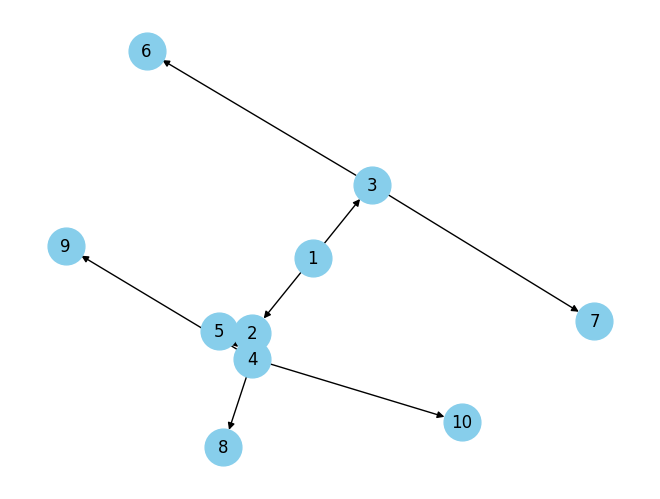

In [118]:
from matplotlib.pyplot import figure
import networkx as nx

figure()
np.random.seed(42)
h = nx.draw(G, with_labels=True, node_size=700, node_color="skyblue", pos=nx.spring_layout(G))


In [119]:
from py_augft import fcn_digraphops

if not isDiGraph:
    if isinstance(A, nx.DiGraph) or isinstance(A, nx.Graph):
        A = nx.adjacency_matrix(A).todense()
    A = (A + A.T) / 2
[U, Q, C, D, L, Lmd, Sgm] = fcn_digraphops(A)

np.set_printoptions(precision=4,suppress=True)
print('U = \n',U)
print('Q = \n',Q)
print('C = \n',C)
print('D = \n',D)
print('L = \n',L)
print('Lmd = \n',Lmd)
print('Sgm = \n',Sgm)

U = 
 [[ 0.2531 -0.0136  0.      0.      0.     -0.534   0.6691 -0.0443  0.4458
  -0.0475]
 [ 0.1507  0.1399  0.      0.     -0.     -0.4741 -0.0484  0.6651 -0.4861
   0.2281]
 [ 0.3839 -0.1673  0.     -0.      0.     -0.071   0.201  -0.5793 -0.6659
   0.0141]
 [ 0.1405  0.2829  0.      0.     -0.     -0.0788 -0.0996  0.0864 -0.1066
  -0.9302]
 [ 0.1379  0.2101  0.      0.     -0.     -0.5416 -0.6489 -0.3884  0.2294
   0.1378]
 [ 0.5502 -0.2798  0.7001 -0.0103 -0.0986  0.1805 -0.1695  0.173   0.1665
  -0.0022]
 [ 0.5502 -0.2798 -0.7001  0.0103  0.0986  0.1805 -0.1695  0.173   0.1665
  -0.0022]
 [ 0.2014  0.4731 -0.1143 -0.1232 -0.799   0.2003  0.084  -0.0258  0.0267
   0.1429]
 [ 0.2014  0.4731  0.0619 -0.6373  0.5066  0.2003  0.084  -0.0258  0.0267
   0.1429]
 [ 0.2014  0.4731  0.0524  0.7605  0.2924  0.2003  0.084  -0.0258  0.0267
   0.1429]]
Q = 
 [[ 0.3513  0.      0.593   0.      0.4148  0.    ]
 [-0.     -0.6379  0.     -0.1478  0.     -0.7558]
 [ 0.     -0.2176 -0.     -0.9068 -

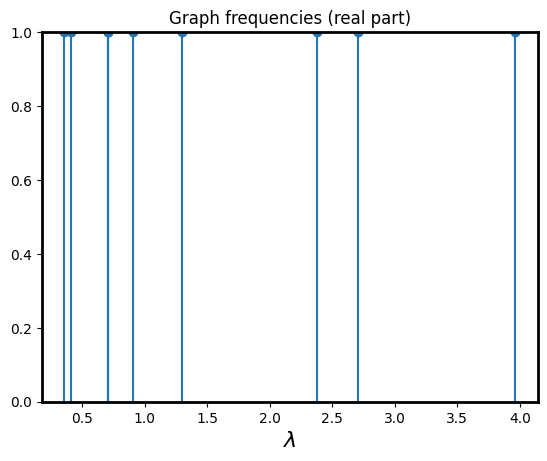

In [120]:
import matplotlib.pyplot as plt
x = np.diag(Lmd)
y = np.ones(x.shape)
plt.stem(x, y, markerfmt='o', basefmt=" ")
plt.title('Graph frequencies (real part)')
plt.xlabel(r'$\lambda$', fontsize=16)
plt.ylim(0, 1)
plt.gca().spines['top'].set_linewidth(2)
plt.gca().spines['right'].set_linewidth(2)
plt.gca().spines['bottom'].set_linewidth(2)
plt.gca().spines['left'].set_linewidth(2)
plt.show()
#plt.savefig(RESULTS_DIR + "EigenValues_sym" + FIGEXT)

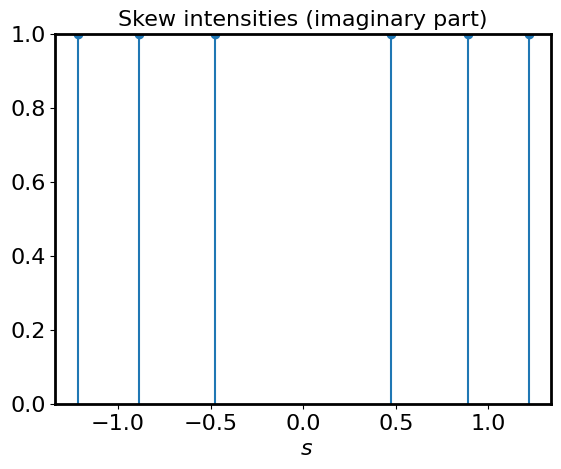

In [121]:
sgm = np.sort(np.concatenate([np.diag(Sgm, 1), np.diag(Sgm, -1)]))
idxg = np.nonzero(sgm)[0]
gma = sgm[idxg]
if len(gma) > 0:
    y = np.ones(len(gma))
    plt.stem(gma, y, markerfmt='o', basefmt=" ")
    plt.title('Skew intensities (imaginary part)', fontsize=16)
    plt.xlabel(' $s$ ', fontsize=16)
    plt.ylim(0, 1)
    ax = plt.gca()
    ax.spines['top'].set_linewidth(2)
    ax.spines['right'].set_linewidth(2)
    ax.spines['bottom'].set_linewidth(2)
    ax.spines['left'].set_linewidth(2)
    ax.tick_params(axis='both', which='major', labelsize=16)
    plt.show()    
    #plt.savefig(RESULTS_DIR + "EigenValues_skw" + FIGEXT)




## $\;{\mathbf{u}}_{\lambda_k }$ 拡張GFT（対称成分）の基底ベクトル

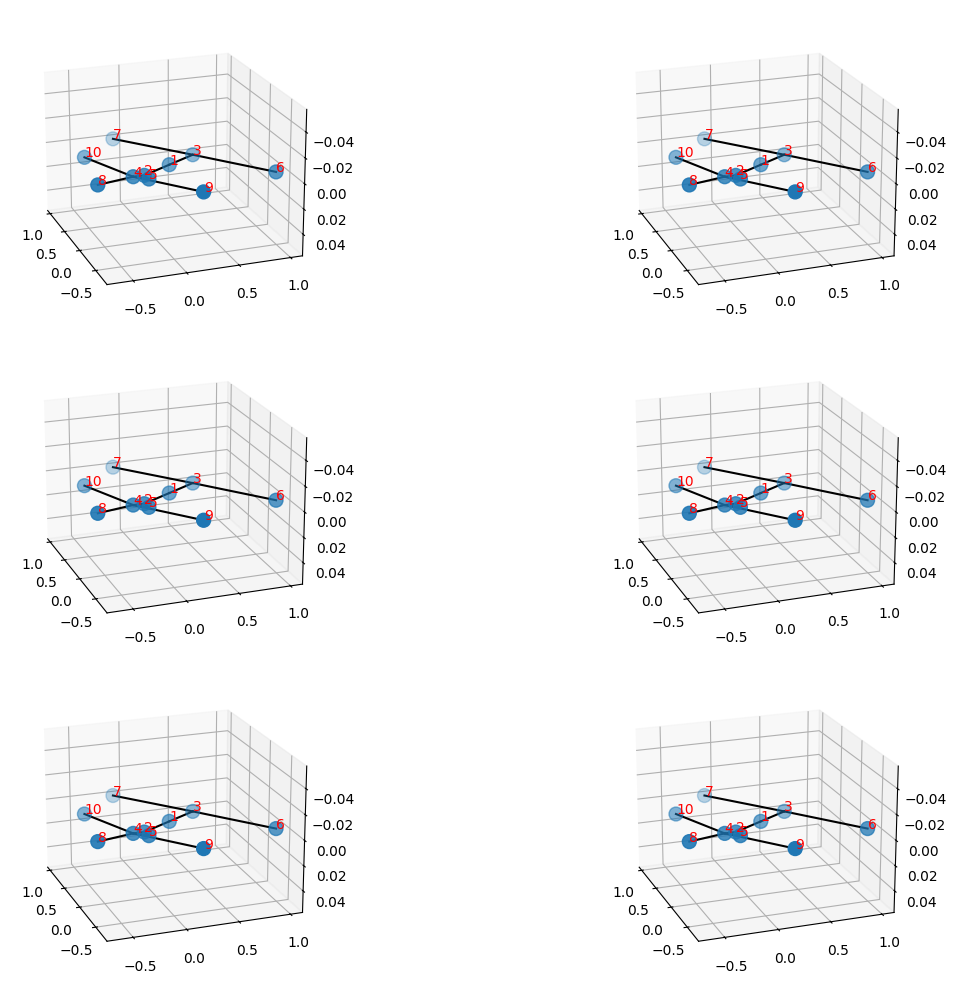

In [122]:
from mpl_toolkits.mplot3d import Axes3D

zscale = .8
fontSize = 12  # 36
lineWidth = 1  # 3
arrowSize = 4  # 12
az = 200
el = 20

fig, axs = plt.subplots(3, 2, subplot_kw={'projection': '3d'}, figsize=(15, 10))

for i in range(3):
    for j in range(2):
        np.random.seed(42)
        ax = axs[i, j]
        pos = nx.spring_layout(G)
        xs, ys = zip(*[pos[n] for n in G.nodes()])
        zs = np.zeros_like(xs)

        ax.scatter(xs, ys, zs, s=100)
        for k, (x, y, z) in enumerate(zip(xs, ys, zs)):
            ax.text(x, y, z, str(k+1), color='red')

        for edge in G.edges():
            x = [pos[edge[0]][0], pos[edge[1]][0]]
            y = [pos[edge[0]][1], pos[edge[1]][1]]
            z = [0, 0]
            ax.plot(x, y, z, color='black')

        ax.view_init(az, el)

plt.tight_layout()
plt.show()


## $\;{\mathit{\mathbf{q}}}_{s_k }$ 拡張GFT（交代成分）の基底ベクトル

In [123]:
figure
tiledlayout(3,2)
for k = 0:min(5,length(gma)/2-1)
    %figure
    nexttile
    qkp = Q(:,2*k+1);
    % +sk
    p1 = plot(G,'LineWidth',lineWidth);
    p1.ArrowSize = arrowSize;
    p1.NodeLabel = {};
    hold on
    stem3(p1.XData,p1.YData,qkp,'fill','LineWidth',lineWidth);
    title(" $\mathbf{q}_{+s_"+num2str(k)+"}$ ",'Interpreter','latex','FontSize',20)
    view(az,el)
    hold off
    ax = gca;
    ax.FontSize = fontSize;
    ax.ZLim = zscale*[-1 1];
    ax.Box = 'off';
    ax.XColor = .99*[1 1 1];
    ax.YColor = .99*[1 1 1];
    ax.ZColor = .99*[1 1 1];
    ax.XLim = [2 7];
    ax.YLim = [2 12];
    ax.Clipping = 'off';
    %exportgraphics(ax,RESULTS_DIR+"qp"+num2str(k)+FIGEXT)
    %
    %figure
    nexttile
    qkm = Q(:,2*k+2);
    % -sk
    p1 = plot(G,'LineWidth',lineWidth);
    p1.ArrowSize = arrowSize;
    p1.NodeLabel = {};
    hold on
    stem3(p1.XData,p1.YData,qkm,'fill','LineWidth',lineWidth);
    title(" $\mathbf{q}_{-s_"+num2str(k)+"}$ ",'Interpreter','latex','FontSize',20)
    view(az,el)
    hold off
    ax = gca;
    ax.FontSize = fontSize;
    ax.ZLim = zscale*[-1 1];
    ax.Box = 'off';
    ax.XColor = .99*[1 1 1];
    ax.YColor = .99*[1 1 1];
    ax.ZColor = .99*[1 1 1];
    ax.XLim = [2 7];
    ax.YLim = [2 12];
    ax.Clipping = 'off';
    %exportgraphics(ax,RESULTS_DIR+"qm"+num2str(k)+FIGEXT)
end

SyntaxError: invalid syntax (3554644352.py, line 3)

##
$$\;$$

## 変動の確認

$$L=\left(\begin{array}{cccc} d_{11}  & -b_{12}  & -b_{13}  & -b_{14} \newline -{\bar{b} }_{12}  & d_{22}  & -b_{23}  & -b_{24} \newline -{\bar{b} }_{13}  & -{\bar{b} }_{23}  & d_{33}  & -b_{34} \newline -{\bar{b} }_{14}  & -{\bar{b} }_{24}  & -{\bar{b} }_{34}  & d_{44}  \end{array}\right)$$


$$\underset{y}{\underbrace{\left(\begin{array}{c} y_1 \newline y_2 \newline y_3 \newline y_4  \end{array}\right)} } =\underset{L}{\underbrace{\left(\begin{array}{cccc} d_{11}  & -b_{12}  & -b_{13}  & -b_{14} \newline -{\bar{b} }_{12}  & d_{22}  & -b_{23}  & -b_{24} \newline -{\bar{b} }_{13}  & -{\bar{b} }_{23}  & d_{33}  & -b_{34} \newline -{\bar{b} }_{14}  & -{\bar{b} }_{24}  & -{\bar{b} }_{34}  & d_{44}  \end{array}\right)} } \underset{x}{\underbrace{\left(\begin{array}{c} x_1 \newline x_2 \newline x_3 \newline x_4  \end{array}\right)} }$$

$$d_{k,k} :=\sum_{\ell \in \mathcal{N}\backslash \lbrace k\rbrace } |c_{k,\ell } |=\sum_{\ell \in \mathcal{N}\backslash \lbrace k\rbrace } |c_{\ell ,k} |=\sum_{\ell \in \mathcal{N}\backslash \lbrace k\rbrace } \sqrt{c_{k,\ell } b_{\ell ,k} }=\sum_{\ell \in \mathcal{N}\backslash \lbrace k\rbrace } \sqrt{c_{k,\ell } {\bar{c} }_{k,\ell } }$$

ただし， $\mathcal{N}:=\lbrace 1,2,\cdots ,N\rbrace$ 。


$$y_k =d_{k,k} x_k -\sum_{\ell =k+1}^N b_{k,\ell } x_{\ell } -\sum_{\ell =1}^{k-1} {\bar{b} }_{k,\ell } x_{\ell }$$


$$\Delta_L (x)=x^T Lx=\sum_{k\in \mathcal{N}} \sum_{\ell =k+1}^N |b_{k,\ell } |\cdot |x_k -e^{-j\angle b_{k,\ell } } x_{\ell } |^2$$


行列計算


In [ ]:
nDims = size(L,1);
x = randn(nDims,1);
xLx = x.'*L*x


累積加算


In [ ]:
tv = 0;
for iRow = 1:nDims
    xk = x(iRow);
    for iCol = iRow+1:nDims
        ckl = C(iRow,iCol);
        xl = x(iCol);
        tv = tv + abs(ckl)*abs(xk-exp(1j*angle(ckl))*xl)^2;
    end
end
tv


誤差評価


In [17]:
assert(abs(xLx - tv)<1e-6,'Invalid TV')

In [ ]:
waterlevel = randn(nDims)


## AuGFTによるフィルタ処理

パラメータ $\alpha$ を導入し一般化したAuGFT

<p style="text-align:left">
   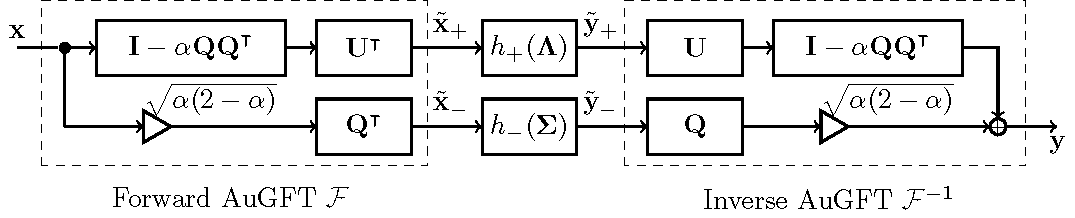
</p>


-  $\displaystyle 0\le \alpha \le 1$
-  $\displaystyle \beta =\sqrt{\alpha (2-\alpha )}$

In [ ]:
syms alpha beta
eqn1 = alpha == (1-sqrt(1-beta^2));
eqn2 = beta <= 1;
eqn3 = beta >= 0;
eqn4 = alpha <= 1;
eqn5 = alpha >= 0;
eqns = [eqn1; eqn2; eqn3; eqn4; eqn5]

In [ ]:
res = solve(eqns,beta,'ReturnConditions',true)

In [ ]:
res.beta

In [ ]:
res.conditions

In [ ]:
figure
fplot(@(x) sqrt(x.*(2-x)),[0 1])
xlabel(' !!!EQ_28!!! ','Interpreter','latex')
ylabel(' !!!EQ_35!!! ','Interpreter','latex')
axis equal
grid on

In [ ]:
x = waterlevel;
freqXSet = fcn_fwdAuGFT(x,U,Q)

In [ ]:
y = fcn_invAuGFT(freqXSet,U,Q)

In [ ]:
rmse = @(rx,ry) norm(rx(:)-ry(:),2)/sqrt(numel(rx));
rmse(waterlevel,y)

In [27]:
assert(norm(x(:)-y(:))<1e-6)


## 辞書学習問題設定

### 問題設定
&nbsp;&nbsp;&nbsp;&nbsp;
$$\lbrace \hat{G} ,\hat{X} \rbrace =\arg \min_{\lbrace G,X\rbrace } \frac{1}{2}\|V-{GX}{\|}_{{\mathrm{F}}}^2 +\beta \mathcal{R}(X)$$

ただし， $V=(v_k )\in {\mathbb{R}}^{N\times K}$ は観測グラフ信号， $\beta$ は正則化パラメータ， $G=(H_0 ,\cdots ,H_{P-1} )\in {\mathbb{R}}^{N\times PN}$ は合成辞書行列， $X\in {\mathbb{R}}^{PN\times K}$ は係数行列， $N$ はノード数， $K$ は観測数， $P$ はフィルタ数

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$$x_k :=[X]_{:,k} \in {\mathbb{R}}^{PN}$$

&nbsp;&nbsp;&nbsp;&nbsp;
$$\mathcal{R}(X)=\sum_k \|x_k {\|}_1$$

&nbsp;&nbsp;&nbsp;&nbsp;
$$x_k :=[X]_{:,k}$$

### 係数更新ステップ
&nbsp;&nbsp;&nbsp;&nbsp;
$$\hat{X} =\arg \min_X \frac{1}{2}\|V-\hat{G} X{\|}_{{\mathrm{F}}}^2 +\beta \mathcal{R}(X)$$

&nbsp;&nbsp;&nbsp;&nbsp;
$$\Leftrightarrow {\hat{x} }_k =\arg \min_{x_k } \frac{1}{2}\|v_k -\hat{G} x_k {\|}_2^2 +\beta \|x_k {\|}_1$$

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $\therefore$ ISTAで解く

### 辞書更新ステップ
&nbsp;&nbsp;&nbsp;&nbsp;
$$\hat{{\theta }} =\arg \min_{{\theta }} \frac{1}{2}\|V-G_{{\theta }} \hat{X} {\|}_{{\mathrm{F}}}^2$$

&nbsp;&nbsp;&nbsp;&nbsp;
$$\hat{G} =G_{\hat{{\theta }} }$$


In [28]:
%x_in = waterlevel


### 自作関数:グラフ信号の可視化

In [29]:
function mygstem3(G, y, RESULTS_DIR, yfile,FIGEXT)
zscale = 400;
fontSize = 36;
lineWidth = 3;
arrowSize = 12;
az = 200;
el = 20;
%
figure
p1 = plot(G,'LineWidth',lineWidth);
p1.ArrowSize = arrowSize;
p1.NodeLabel = {};
hold on
stem3(p1.XData,p1.YData,y,'fill','LineWidth',lineWidth);
axis off
view(az,el)
hold off
ax = gca;
%
ax.FontSize = fontSize;
ax.ZLim = zscale*[-1 1];
ax.Box = 'on';
ax.XColor = .99*[1 1 1];
ax.YColor = .99*[1 1 1];
ax.ZColor = .99*[1 1 1];
ax.XLim = [2 7];
ax.YLim = [2 12];
ax.Clipping = 'off';
%
%exportgraphics(ax,RESULTS_DIR+yfile+FIGEXT)
end

function cost =  mycost_(hp,hm,U,Q,L,x)
y = myfilt_(x,hp,hm,U,Q);
v = L*y;
cost = 0;
for idx = 1:size(v,2)
    cost = cost + real(y(:,idx)'*v(:,idx));
end
cost = cost/size(v,2);
end

function y = myfilt_(x,hp,hm,U,Q)
N = size(x,1);
r = size(Q,2);
freqX = fcn_fwdAuGFT(x,U,Q);
freqXp = freqX(1:N,:);
freqYp = hp.*freqXp;
freqXm = freqX(N+1:end,:);
%
if r == 0
    freqYm = [];
else
    tmp = [1 0 ; -1 0]*ones(2,r/2)*diag(hm); % FIXME: h_(Σ)
    tmp = upsample(tmp.',2).';
    tmp = tmp(:,1:end-1);
    h_Sgm = diag(tmp(1,:),1)+diag(tmp(2,:),-1);
    freqYm = h_Sgm * freqXm; % TODO: h_Sgm
end
%
freqY = vertcat(freqYp,freqYm);
y = fcn_invAuGFT(freqY,U,Q);

end


## 辞書学習問題設定（付録）

### 問題設定
&nbsp;&nbsp;&nbsp;&nbsp;
$$\lbrace \hat{G} ,\hat{X} \rbrace =\arg \min_{\lbrace G,X\rbrace } \frac{1}{2}\|V-{GX}{\|}_{{\mathrm{F}}}^2 +\beta \mathcal{R}(X)$$

ただし， $V=(v_k )$ は観測グラフ信号， $\beta$ は正則化パラメータ，

&nbsp;&nbsp;&nbsp;&nbsp;
$$\mathcal{R}(X)=\frac{1}{2}\sum_k \Delta_L ({{Gx}}_k )=\frac{1}{2}\sum_k ({{Gx}}_k )^T L{{Gx}}_k$$

&nbsp;&nbsp;&nbsp;&nbsp;
$$x_k :=[X]_{:,k}$$

### 係数更新ステップ
&nbsp;&nbsp;&nbsp;&nbsp;
$$\hat{X} =\arg \min_X \frac{1}{2}\|V-\hat{G} X{\|}_{{\mathrm{F}}}^2 +\beta \mathcal{R}(X)$$

&nbsp;&nbsp;&nbsp;&nbsp;
$$\Leftrightarrow {\hat{x} }_k =\arg \min_{x_k } \frac{1}{2}\|v_k -\hat{G} x_k {\|}_2^2 +\frac{\beta }{2}(\hat{G} x_k )^T L\hat{G} x_k$$

 $z$ が複素ベクトル， $L$ がエルミート対称（複素）行列であることに注意．

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$$\frac{1}{2}\frac{\partial }{\partial z^H }\left(\|v-Gz{\|}_2^2 +\beta ({Gz})^H L{Gz}\right)$$

&nbsp;&nbsp;&nbsp;&nbsp;
$$=\frac{1}{2}\frac{\partial }{\partial z^H }\|v-Gz{\|}_2^2 +\beta ({Gz})^H L{Gz}$$

&nbsp;&nbsp;&nbsp;&nbsp;
$$=-G^H (v-Gz)+\beta G^H L{Gz}$$

&nbsp;&nbsp;&nbsp;&nbsp;
$$=-G^H v+G^H (I+\beta L){Gz}=0$$

&nbsp;&nbsp;&nbsp;&nbsp;
$$\therefore \hat{x} ={\left(G^T (I+\beta L)G\right)}^{-1} G^T v$$

### 辞書更新ステップ
&nbsp;&nbsp;&nbsp;&nbsp;
$$\hat{{\theta }} =\arg \min_{{\theta }} \frac{1}{2}\|V-G_{{\theta }} \hat{X} {\|}_{{\mathrm{F}}}^2$$

&nbsp;&nbsp;&nbsp;&nbsp;
$$\hat{G} =G_{\hat{{\theta }} }$$
